<a href="https://colab.research.google.com/github/comparativechrono/Phase-oscillator-modelling-of-circadian-entrainment-in-transplanted-human-hearts/blob/main/Hearn_(2025)_Figure_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

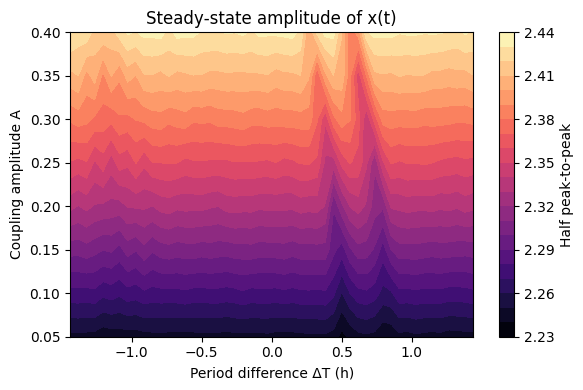

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Shared setup
omega_H = 2 * np.pi / 24.0
phase_hours = np.array([2,4,6,8,10,12,14,16,18,20,22,24])
shift_hours = np.array([1.0,2.2,2.5,2.0,1.0,-0.2,-1.5,-2.8,-3.5,-3.0,-1.0,0.2])
phase_rad = phase_hours / 24 * 2 * np.pi
shift_rad = shift_hours / 24 * 2 * np.pi
interp_func = interp1d(phase_rad, shift_rad, kind='cubic', fill_value='extrapolate')

def Z(phi):
    return interp_func(phi % (2*np.pi))

mu = 1
As = np.linspace(0.05, 0.4, 8)    # coupling strengths
dWs = np.linspace(-0.06, 0.06, 50) # frequency detuning (rad/h)
t = np.linspace(0,200,2001)

amp = np.zeros((len(As), len(dWs)))

for i, A in enumerate(As):
    for j, dW in enumerate(dWs):
        x, y = 1., 0.
        omega_A = omega_H + dW
        for tv in t:
            force = A * np.cos(omega_A * tv)
            dx = y
            dy = mu * (1 - x**2) * y - x + force
            x += dx * (t[1] - t[0])
            y += dy * (t[1] - t[0])
        # measure amplitude in the second half
        xx = []
        for tv in t[len(t)//2:]:
            force = A * np.cos(omega_A * tv)
            dx = y
            dy = mu * (1 - x**2) * y - x + force
            x += dx * (t[1] - t[0])
            y += dy * (t[1] - t[0])
            xx.append(x)
        amp[i, j] = (max(xx) - min(xx)) * 0.5

plt.figure(figsize=(6,4))
plt.contourf(dWs * 24, As, amp, levels=20, cmap='magma')
plt.xlabel('Period difference ΔT (h)')
plt.ylabel('Coupling amplitude A')
plt.title('Steady‑state amplitude of x(t)')
plt.colorbar(label='Half peak‑to‑peak')
plt.tight_layout()
plt.savefig('Figure_6.png', dpi=300, bbox_inches='tight')
plt.show()